# Pre-Class - Session 7.1

## Sayama Exercise 16.14 
Revise the small world network formation model
above so that the network is initially a two dimensional grid in which each node is
connected to its four neighbors. (north, south, east, and west; except for those on the
boundaries of the space). Then run the simulations, and see how random edge rewiring
changes the topology of the network.

In [31]:
import matplotlib
# matplotlib.use('TkAgg')
# plt.style.use('ggplot')
from pylab import *
import networkx as nx
import random as rd

n = 30 # number of nodes
k = 4 # number of neighbors of each node

def initialize(with_pos=False):
    global g
#     g = nx.Graph()
#     for i in range(n):
#         for j in range(1, k // 2 + 1):
#             g.add_edge(i, (i + j) % n)
#             g.add_edge(i, (i - j) % n)
    g = nx.grid_graph(dim=[int(30**0.5)+1, int(30**0.5)+1])
    if with_pos:
        g.pos = nx.spring_layout(g)
    g.count = 0

def observe(with_pos=False):
    global g
    cla()
    if with_pos:
        nx.draw(g, pos = g.pos)
    else: 
        nx.draw(g)

def update(with_pos=False):
    global g
    g.count += 1
    if g.count % 20 == 0: # rewiring once in every 20 steps
        nds = list(g.nodes)
        i = rd.choice(nds)
        if g.degree[i] > 0:
            g.remove_edge(i, rd.choice(list(g.neighbors(i))))
            nds.remove(i)
            for j in g.neighbors(i):
                nds.remove(j)
            g.add_edge(i, rd.choice(nds))

    # simulation of node movement
    if with_pos:
        g.pos = nx.spring_layout(g, pos = g.pos, iterations = 5)



/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


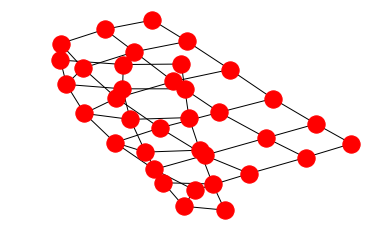

In [38]:
# Without spring layout
initialize()
observe()

/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


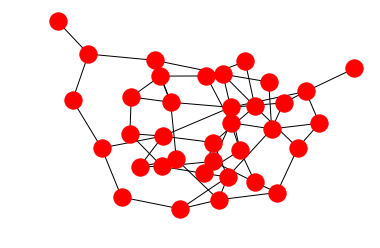

In [39]:
for i in range(1000):
    update()
observe()

/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


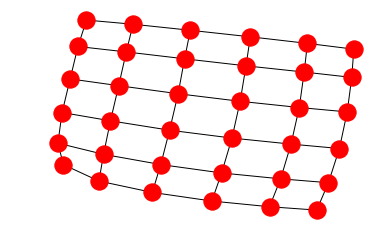

In [48]:
# With spring layout
initialize(with_pos=True)
observe(with_pos=True)

/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


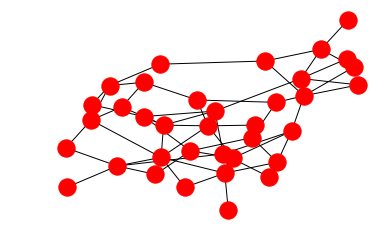

In [49]:
for i in range(1000):
    update(with_pos=True)
observe(with_pos=True)

In [57]:
# rolette method

x = np.array([g.degree[node] for node in g.nodes])
print(x)
cumulative = x.cumsum()
print(cumulative)
print(cumulative.searchsorted(np.random.uniform(0, cumulative[-1], size=1)))

[1 3 4 3 1 2 5 3 3 5 4 2 1 5 5 4 4 2 1 5 5 4 4 3 4 6 4 6 3 2 2 2 5 2 2 3]
[  1   4   8  11  12  14  19  22  25  30  34  36  37  42  47  51  55  57
  58  63  68  72  76  79  83  89  93  99 102 104 106 108 113 115 117 120]
[14]


## Sayama Exercise 16.15
Simulate the Barabási-Albert network growth
model with m  = 1 , m  = 3 , and m  = 5 , and see how the growth process may be affected by
the variation of this parameter.

In [67]:
import matplotlib
matplotlib.use('TkAgg')
from pylab import *
import networkx as nx

m0 = 5 # number of nodes in initial condition
m = 5 # number of edges per new node

def initialize():
    global g
    g = nx.complete_graph(m0)
    g.pos = nx.spring_layout(g)
    g.count = 0

def observe():
    global g
    cla()
    nx.draw(g, pos = g.pos)

# def pref_select(nds):
#     global g        
#     x = np.array([g.degree[node] for node in nds])
#     cumulative = x.cumsum()
#     return cumulative.searchsorted(np.random.uniform(0, cumulative[-1], size=1))

def pref_select(nds):
    global g
    r = uniform(0, sum(g.degree(i) for i in nds))
    x=0
    for i in nds:
        x += g.degree[i]
        if r <= x:
            return i

def update():
    global g
    g.count += 1
    if g.count % 20 == 0: # network growth once in every 20 steps
        nds = list(g.nodes)
        newcomer = max(nds) + 1
        for i in range(m):
            j = pref_select(nds)
            g.add_edge(newcomer, j)
            nds.remove(j)
        g.pos[newcomer] = (0, 0)

    # simulation of node movement
    g.pos = nx.spring_layout(g, pos = g.pos, iterations = 5)
import pycxsimulator
pycxsimulator.GUI().start(func=[initialize, observe, update])

/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


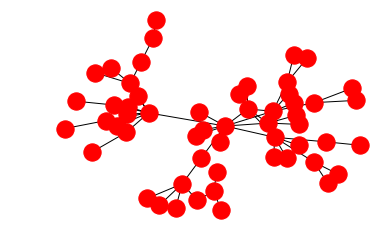

In [68]:
m = 1
initialize()
observe()
for i in range(1000):
    update()
observe()

/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


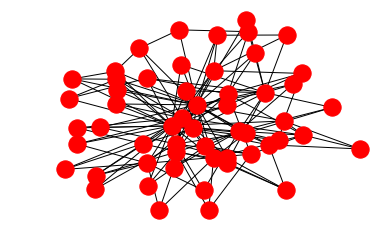

In [69]:
m = 3
initialize()
observe()
for i in range(1000):
    update()
observe()

/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


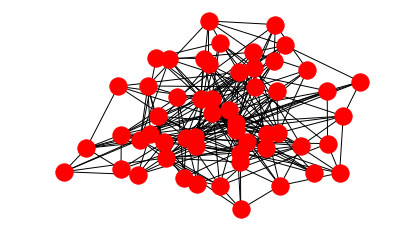

In [70]:
m = 5
initialize()
observe()
for i in range(1000):
    update()
observe()